In [1]:
import os
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.rcParams['lines.linewidth'] = 0.8
# plt.rcParams['lines.markersize'] = 4.0
# plt.rcParams['figure.figsize'] = 20, 10

In [2]:
# csv_path = "/home/icer/Downloads/preprocess_1.csv"
csv_path = "/home/icer/Project/icer/openface/data/preprocess_araki.csv"
df = pd.read_csv(csv_path, engine='python')

"""
データの順番
/home/icer/Videos/Webcam/processed_data/nod2-2.csv
/home/icer/Videos/Webcam/processed_data/other2-2.csv
/home/icer/Videos/Webcam/processed_data/nod2-1.csv
/home/icer/Videos/Webcam/processed_data/other2-1.csv
/home/icer/Videos/Webcam/processed_data/other2-3.csv
/home/icer/Videos/Webcam/processed_data/nod2-3.csv
"""

In [3]:
df['label'].astype(int)
cl0 = (df['label'] == 0)
cl1 = (df['label'] == 1)
print(f"cl0: {cl0.sum()}, cl1: {cl1.sum()}")
print(f"cl0: {cl0.sum()/(cl0.sum() + cl1.sum())}, cl1: {cl1.sum()/(cl0.sum() + cl1.sum())}")

df

cl0: 239, cl1: 160
cl0: 0.5989974937343359, cl1: 0.40100250626566414


,Unnamed: 0,mean_x,std_x,mad_x,max_x,min_x,energy_x,entropy_x,iqr_x,range_x,...,entropy_z,iqr_z,range_z,skewness_z,kurtosis_z,frame_in,frame_out,timestamp_in,timestamp_out,label
0,0,0.006844,0.050951,0.0335,0.068,-0.114,0.002643,-inf,0.08425,0.182,...,-inf,0.09425,0.154,0.288801,-1.388185,1.0,32.0,0.000,1.033,1.0
1,1,0.012406,0.126853,0.0690,0.348,-0.166,0.016246,-inf,0.11450,0.514,...,-inf,0.04250,0.117,-0.033182,-0.791665,17.0,48.0,0.533,1.567,1.0
2,2,0.088375,0.143556,0.1005,0.348,-0.166,0.028418,-inf,0.20050,0.514,...,-inf,0.03100,0.089,-0.748987,-0.033459,33.0,64.0,1.067,2.100,1.0
3,3,0.088625,0.175553,0.0895,0.360,-0.421,0.038673,-inf,0.17525,0.781,...,-inf,0.01900,0.072,-0.845825,0.957004,49.0,80.0,1.600,2.633,1.0
4,4,0.107312,0.188037,0.1060,0.360,-0.421,0.046874,-inf,0.15250,0.781,...,-inf,0.03250,0.069,0.071124,-0.966064,65.0,96.0,2.133,3.167,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,394,-0.051437,0.062537,0.0375,0.102,-0.147,0.006557,-inf,0.06225,0.249,...,3.428758,0.02450,0.063,0.092663,-0.683991,961.0,992.0,32.000,33.033,1.0
395,395,-0.015906,0.165907,0.0695,0.429,-0.191,0.027778,-inf,0.15575,0.620,...,3.250046,0.06375,0.233,-1.315751,0.350949,977.0,1008.0,32.533,33.567,1.0
396,396,0.085000,0.199447,0.1515,0.429,-0.191,0.047004,-inf,0.33050,0.620,...,3.277366,0.16125,0.222,-0.281449,-1.502605,993.0,1024.0,33.067,34.100,1.0
397,397,0.152594,0.163435,0.1570,0.429,-0.080,0.049996,-inf,0.31725,0.509,...,3.341211,0.12875,0.221,0.062897,-1.278214,1009.0,1040.0,33.600,34.633,1.0


In [4]:
df = df.replace([np.inf, -np.inf], np.nan)
print(f"欠損値:\n{df.isnull().sum()}")
data = df.dropna(axis=1, how="any")

X = data.iloc[:, 1:-5]
y = data["label"].astype(int)

欠損値:
Unnamed: 0         0
mean_x             0
std_x              0
mad_x              0
max_x              0
min_x              0
energy_x           0
entropy_x        140
iqr_x              0
range_x            0
skewness_x         0
kurtosis_x         0
mean_y             0
std_y              0
mad_y              0
max_y              0
min_y              0
energy_y           0
entropy_y         31
iqr_y              0
range_y            0
skewness_y         0
kurtosis_y         0
mean_z             0
std_z              0
mad_z              0
max_z              0
min_z              0
energy_z           0
entropy_z         90
iqr_z              0
range_z            0
skewness_z         0
kurtosis_z         0
frame_in           0
frame_out          0
timestamp_in       0
timestamp_out      0
label              0
dtype: int64


In [5]:
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

# RandomForestRegressorでBorutaを実行
rf = RandomForestRegressor(n_jobs=-1, max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=1)
feat_selector.fit(X.values, y.values)

# 選択された特徴量を確認
selected = feat_selector.support_
print('選択された特徴量の数: %d' % np.sum(selected))
print(selected)
print(X.columns[selected])

X_selected = X.iloc[:,feat_selector.support_]

選択された特徴量の数: 9
[ True False  True  True False  True  True  True False False False False
 False  True  True False False False False False False False False False
 False False False False False  True]
Index(['mean_x', 'mad_x', 'max_x', 'energy_x', 'iqr_x', 'range_x', 'max_y',
       'min_y', 'kurtosis_z'],
      dtype='object')


In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

random_state = 0

# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=random_state)
X_train, X_test = X_selected[142:], X_selected[0:142]
y_train, y_test = y[142:], y[0:142]

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# kernel SVMのインスタンスを生成
model = SVC(kernel='rbf', random_state=random_state)

# モデルの学習
model.fit(X_train_std, y_train)

# トレーニングデータに対する精度
pred_train = model.predict(X_train_std)
accuracy_train = accuracy_score(y_train, pred_train)
precision_train = precision_score(y_train, pred_train)
recall_train = recall_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)
print('トレーニングデータに対する適合率： %.2f' % precision_train)
print('トレーニングデータに対する再現率： %.2f' % recall_train)
cm = confusion_matrix(y_train, pred_train)
print(cm)

# テストデータに対する精度
pred_test = model.predict(X_test_std)
accuracy_test = accuracy_score(y_test, pred_test)
precision_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)
print('テストデータに対する正解率： %.2f' % accuracy_test)
print('テストデータに対する適合率： %.2f' % precision_test)
print('テストデータに対する再現率： %.2f' % recall_test)

cm = confusion_matrix(y_test, pred_test)
print(cm)

トレーニングデータに対する正解率： 0.98
トレーニングデータに対する適合率： 0.95
トレーニングデータに対する再現率： 0.99
[[153   5]
 [  1  98]]
テストデータに対する正解率： 0.94
テストデータに対する適合率： 0.92
テストデータに対する再現率： 0.95
[[76  5]
 [ 3 58]]


In [ ]:
def output_csv(
    base_df: pd.core.frame.DataFrame,
    pred_result: np.ndarray,
    columns: list=['frame_in', 'frame_out', 'label'],
    output_path: str="output_pred.csv"
):
    """
    base_df: predに対応するDataFrame
    pred_result: 判別後の予測結果 (ndarray)
    columns: outputするカラム名のリスト
    """
    base_df = base_df[columns]
    base_df = base_df.assign(pred=pred_result)
    
    frame_in = base_df["frame_in"].iloc[0].astype(int)
    frame_out = base_df["frame_out"].iloc[-1].astype(int)
    cum_pred = np.zeros(frame_out - frame_in)

    out_df = pd.DataFrame(columns=['frame', 'label', 'pred'])

    for i, (_, row) in enumerate(base_df.iterrows()):
        fin = row['frame_in'].astype(int)
        fout = row['frame_out'].astype(int)

        for frame in range(fin, fout + 1):
            if (out_df['frame'] == frame).sum() == 0:
                out_df = out_df.append({
                    'frame': frame,
                    'label': row['label'],
                    'pred': row['pred'],
                }, ignore_index=True)
            else:
                if row['pred'] == 1:
                    out_df.loc[out_df['frame'] == frame, 'pred'] += 1
                    
    if output_path is not None:
        out_df.to_csv(output_path, index=False)

    return out_df


test_df0 = df[0:61]
pred_test0 = pred_test[0:61]
test_df1 = df[61:142]
pred_test1 = pred_test[61:142]
    
out_df0 = output_csv(test_df0, pred_test0, output_path="output_pred0.csv")
out_df1 = output_csv(test_df1, pred_test1, output_path="output_pred1.csv")
print((out_df0['pred'] == 2).sum())
print((out_df1['pred'] == 2).sum())

In [44]:
import cv2
import tqdm
from typing import Tuple


def get_video_capture(video_path: str) -> cv2.VideoCapture:
    return cv2.VideoCapture(video_path)


def get_video_length(video_path: str) -> int:
    video_capture = get_video_capture(video_path)
    return int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))


def get_frame_position(video_capture: cv2.VideoCapture) -> int:
    return int(video_capture.get(cv2.CAP_PROP_POS_FRAMES))


def set_frame_position(video_capture: cv2.VideoCapture, position: int) -> int:
    return int(video_capture.set(cv2.CAP_PROP_POS_FRAMES, position))


def get_video_dimension(video_path: str) -> Tuple[int, int]:
    video_capture = get_video_capture(video_path)
    return int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))


def get_video_framerate(video_path: str) -> float:
    video_capture = get_video_capture(video_path)
    return float(video_capture.get(cv2.CAP_PROP_FPS))


def output_video_nod(nod_df, video_path: str, output_path: str = "output_video_nod"):
    video_capture = get_video_capture(video_path)
    video_length = get_video_length(video_path)

    print(nod_df)
    start, end = nod_df['frame'].iloc[0].astype(int), nod_df['frame'].iloc[-1].astype(int)
#     bar = tqdm.tqdm(total=end - start)

    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    video_writer = cv2.VideoWriter(output_path, fourcc, get_video_framerate(video_path),
                                   get_video_dimension(video_path))

    frame_index = start
    set_frame_position(video_capture, start)  # Move position
    while video_capture.isOpened() and get_frame_position(video_capture) in range(start, end):
        ret, frame = video_capture.read()
#         # Progress
#         bar.update(1)
#         bar.refresh()

        nod = nod_df[nod_df['frame'] == frame_index]['pred'].values[0]

        # BBox
        left, top = 200, 200
        right, bottom = 400, 400
        p1 = (left, top)
        p2 = (right, bottom)
        texts = {0: "No", 1: "Nod", 2: "Nod!!!"}

        # Draw circle when nod flag == 1 or 2
        if nod > 0:
            mid = (np.array(p1) + np.array(p2)) // 2
#             frame = cv2.circle(frame, tuple(mid), radius=100, color=(0, 0, 255), thickness=int(1 * nod))


            frame = cv2.putText(frame, texts[nod], (50, 50), cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 255), 5, cv2.LINE_AA)

        video_writer.write(frame)
        frame_index += 1

    video_capture.release()
    video_writer.release()

# nod_df = out_df0
# video_path = "/home/icer/Videos/Webcam/processed_data/nod2-2.avi"
# output_path = "pred_nod2-2.mp4"

nod_df = out_df1
video_path = "/home/icer/Videos/Webcam/processed_data/other2-2.avi"
output_path = "pred_other2-2.mp4"
output_video_nod(nod_df, video_path, output_path)

       frame  label  pred
0        1.0    0.0   0.0
1        2.0    0.0   0.0
2        3.0    0.0   0.0
3        4.0    0.0   0.0
4        5.0    0.0   0.0
...      ...    ...   ...
1307  1308.0    0.0   0.0
1308  1309.0    0.0   0.0
1309  1310.0    0.0   0.0
1310  1311.0    0.0   0.0
1311  1312.0    0.0   0.0

[1312 rows x 3 columns]


[0, 61, 142, 176, 257, 334]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 1., 2.

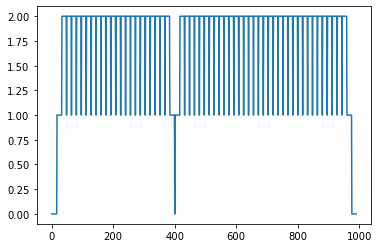

In [24]:
# 各動画の開始行indexを取得
vid_index_list = df.index[df['timestamp_in'] == 0].tolist()
print(vid_index_list)

result0_pred = pred_test[vid_index_list[0] : vid_index_list[1]]
result0_df = df.iloc[vid_index_list[0]:vid_index_list[1]]
# result0_df.iloc[0]
framein = result0_df["frame_in"].iloc[0].astype(int)
frameout = result0_df["frame_out"].iloc[-1].astype(int)

result0 = np.zeros(frameout - framein)

for i, (_, data) in enumerate(result0_df.iterrows()):
    pred = result0_pred[i]

    if pred == 1:
        fin = data["frame_in"].astype(int)
        fout = data["frame_out"].astype(int)
        result0[fin:fout] += 1

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(result0)
result0